<a href="https://colab.research.google.com/github/dhanvinjani/Class-exercise/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
# URLs for confirmed cases and deaths
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

# Read data into dataframes
confirmed_cases_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_url)

# Drop unnecessary columns (Latitude, Longitude, etc.)
confirmed_cases_df = confirmed_cases_df.drop(columns=['Lat', 'Long', 'Province/State'])
deaths_df = deaths_df.drop(columns=['Lat', 'Long', 'Province/State'])

# Aggregate and sum on a global level
global_confirmed_cases = confirmed_cases_df.sum(axis=0)[3:]  # Starting from the 4th column (dates)
global_deaths = deaths_df.sum(axis=0)[3:]  # Starting from the 4th column (dates)

# Create a new dataframe
global_data = pd.DataFrame({
    'Date': global_confirmed_cases.index,
    'Global_Confirmed_Cases': global_confirmed_cases.values,
    'Global_Deaths': global_deaths.values
})

# Display the resulting dataframe
#print(global_data)
global_data


,Date,Global_Confirmed_Cases,Global_Deaths
0,1/24/20,944,26
1,1/25/20,1437,42
2,1/26/20,2120,56
3,1/27/20,2929,82
4,1/28/20,5580,131
...,...,...,...
1136,3/5/23,676024901,6877749
1137,3/6/23,676082941,6878115
1138,3/7/23,676213378,6879038
1139,3/8/23,676392824,6880483


In [3]:
global_data.to_csv("Coviddata.csv")

Overall American Market >> Microsoft Corporation ( MSFT) Overall Canadian Market >>Canadian Imperial Bank of Commerce (CM) Travel sector >> Carnival Corporation (CCL) The Real Estate sector >> Welltower Inc. (WELL) - One of the largest homebuilders in the United States. Precious metals (Gold, Silver, Platinum, etc) >> Kinross Gold (KGC)

In [4]:
pip install alpha_vantage

In [5]:
####For AAL American Market
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import time

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
api_key = 'O19KRLXOXX687XJX'

# Symbol for the stock you want to retrieve data for
symbol = 'AAL'  # Example: American Airlines Group Inc.

# Date for which you want to get the daily high and low prices
date = '2023-11-24'  # Example: November 24, 2023

# Alpha Vantage API endpoint for daily stock prices
endpoint = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}'

try:
    # Make the API request
    response = requests.get(endpoint)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        data = response.json()

        # Check if the date is available in the response
        if date in data['Time Series (Daily)']:
            # Extract high and low prices for the specified date
            high_price = float(data['Time Series (Daily)'][date]['2. high'])
            low_price = float(data['Time Series (Daily)'][date]['3. low'])

            print(f"For {symbol} on {date}:")
            print(f"High Price: {high_price}")
            print(f"Low Price: {low_price}")
        else:
            print(f"No data available for {symbol} on {date}")
    else:
        print(f"Error: {response.status_code} - {response.text}")
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: name 'requests' is not defined


         Date  MSFT_High  MSFT_Low
0     1/24/20   167.5300    164.45
1     1/25/20     0.0000      0.00
2     1/26/20     0.0000      0.00
3     1/27/20   163.3800    160.20
4     1/28/20   165.7600    163.07
...       ...        ...       ...
1136   3/5/23     0.0000      0.00
1137   3/6/23   260.1200    255.98
1138   3/7/23   257.6900    253.39
1139   3/8/23   254.5417    250.81
1140   3/9/23   259.5600    251.58

[1141 rows x 3 columns]


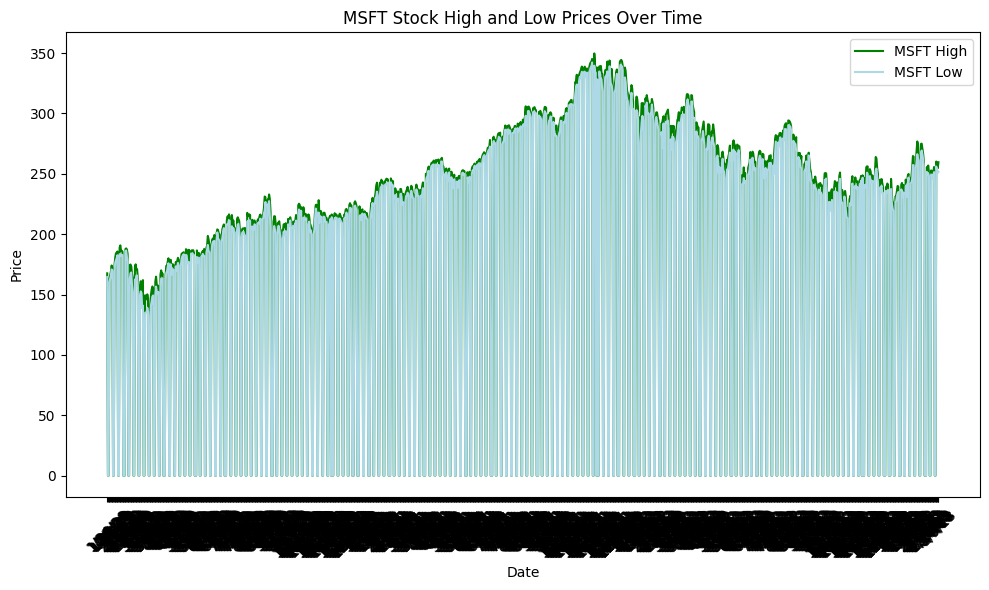

In [6]:
####For Microsoft Corporation- American Market
#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='MSFT', outputsize='full')

for date in global_data['Date']:
  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]

  global_data.loc[global_data['Date'] == date, 'MSFT_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'MSFT_Low'] = low_price


print(global_data[['Date', 'MSFT_High', 'MSFT_Low']])

import matplotlib.pyplot as plt

# Assuming global_data contains the DataFrame with Date, MSFT_High, MSFT_Low columns

# Plotting the data
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(global_data['Date'], global_data['MSFT_High'], label='MSFT High', color='green')
plt.plot(global_data['Date'], global_data['MSFT_Low'], label='MSFT Low', color='lightblue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MSFT Stock High and Low Prices Over Time')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Adding legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

      CM_High  CM_Low
0      83.150   82.56
1       0.000    0.00
2       0.000    0.00
3      82.550   81.73
4      83.150   82.39
...       ...     ...
1136    0.000    0.00
1137   46.720   46.15
1138   46.220   44.81
1139   44.915   44.21
1140   44.430   42.36

[1141 rows x 2 columns]
      CM_High  CM_Low
0      83.150   82.56
1       0.000    0.00
2       0.000    0.00
3      82.550   81.73
4      83.150   82.39
...       ...     ...
1136    0.000    0.00
1137   46.720   46.15
1138   46.220   44.81
1139   44.915   44.21
1140   44.430   42.36

[1141 rows x 2 columns]


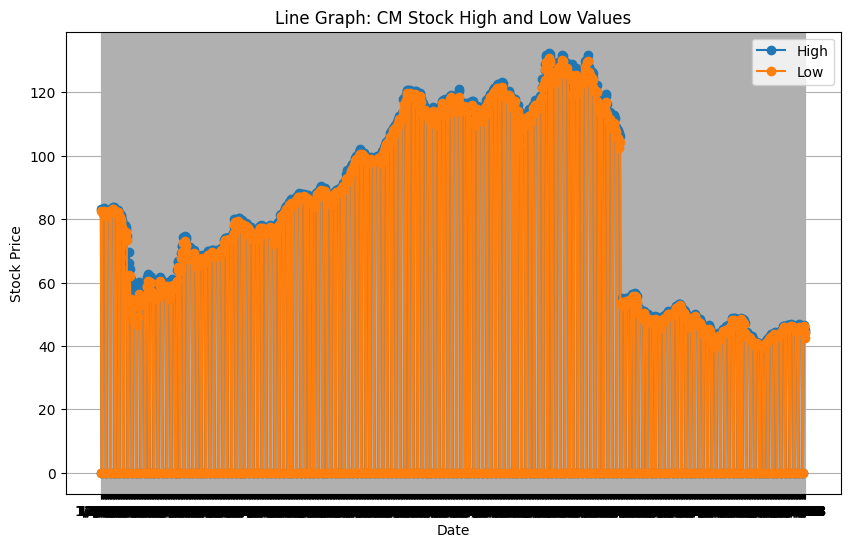

In [7]:
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='CM', outputsize='full')
#x=ts.get_daily()
for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]

  global_data.loc[global_data['Date'] == date, 'CM_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'CM_Low'] = low_price


print(global_data[[ 'CM_High', 'CM_Low']])
import plotly.graph_objects as go
# Plotting the line graph with high and low values
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
print(global_data[[ 'CM_High', 'CM_Low']])
plt.plot(global_data['Date'], global_data['CM_High'], label='High', marker='o')
plt.plot(global_data['Date'], global_data['CM_Low'], label='Low', marker='o')
plt.title('Line Graph: CM Stock High and Low Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

# Plotting the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=global_data['Date'],
                open=global_data['CM_High'],
                high=global_data['CM_High'],
                low=global_data['CM_Low'],
                close=global_data['CM_Low'])])
fig.update_layout(title='Candlestick Chart: CM Stock',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=False)
# Show the plots
plt.show()
fig.show()

      CCL_High  CCL_Low
0      49.3000   47.120
1       0.0000    0.000
2       0.0000    0.000
3      46.1400   44.730
4      46.8550   45.375
...        ...      ...
1136    0.0000    0.000
1137   11.5300   11.070
1138   11.1950   10.860
1139   10.9698   10.450
1140   10.5900    9.940

[1141 rows x 2 columns]
      CM_High  CM_Low
0      83.150   82.56
1       0.000    0.00
2       0.000    0.00
3      82.550   81.73
4      83.150   82.39
...       ...     ...
1136    0.000    0.00
1137   46.720   46.15
1138   46.220   44.81
1139   44.915   44.21
1140   44.430   42.36

[1141 rows x 2 columns]


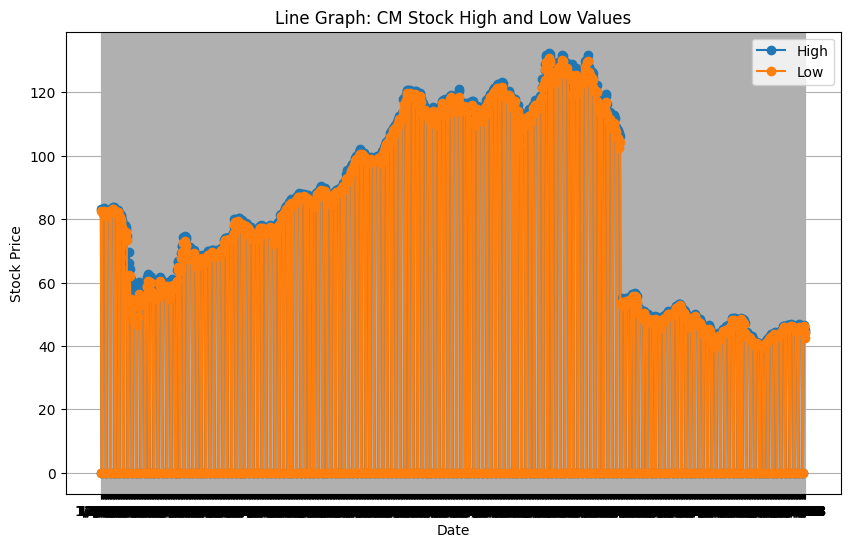

In [8]:
###For Carnival Corporation - Travel sector


ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='CCL', outputsize='full')
for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]

  global_data.loc[global_data['Date'] == date, 'CCL_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'CCL_Low'] = low_price


print(global_data[[ 'CCL_High', 'CCL_Low']])

import plotly.graph_objects as go
# Plotting the line graph with high and low values
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
print(global_data[[ 'CM_High', 'CM_Low']])
plt.plot(global_data['Date'], global_data['CM_High'], label='High', marker='o')
plt.plot(global_data['Date'], global_data['CM_Low'], label='Low', marker='o')
plt.title('Line Graph: CM Stock High and Low Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

# Plotting the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=global_data['Date'],
                open=global_data['CM_High'],
                high=global_data['CM_High'],
                low=global_data['CM_Low'],
                close=global_data['CM_Low'])])
fig.update_layout(title='Candlestick Chart: CM Stock',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=False)
# Show the plots
plt.show()
fig.show()

In [9]:
###For Carnival Corporation - Travel sector

#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='CCL', outputsize='full')
for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]

  global_data.loc[global_data['Date'] == date, 'CCL_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'CCL_Low'] = low_price


print(global_data[[ 'CCL_High', 'CCL_Low']])

      CCL_High  CCL_Low
0      49.3000   47.120
1       0.0000    0.000
2       0.0000    0.000
3      46.1400   44.730
4      46.8550   45.375
...        ...      ...
1136    0.0000    0.000
1137   11.5300   11.070
1138   11.1950   10.860
1139   10.9698   10.450
1140   10.5900    9.940

[1141 rows x 2 columns]


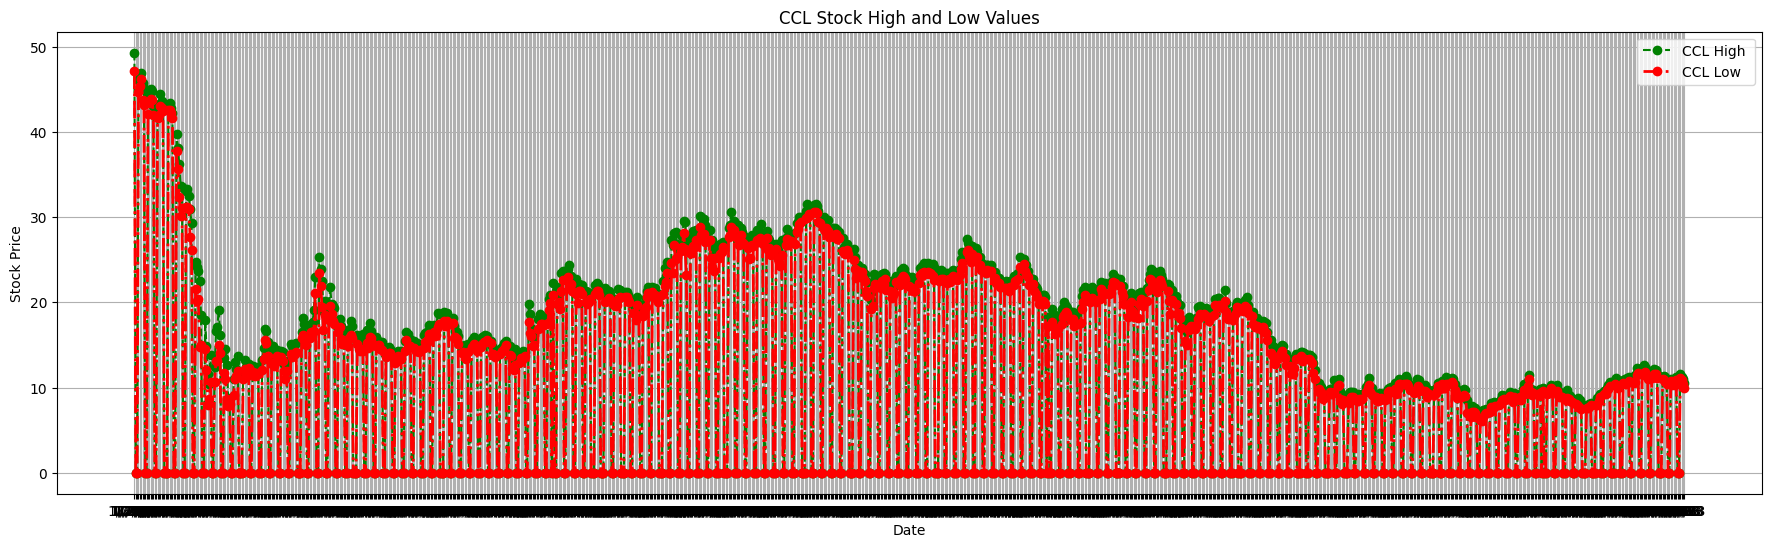

In [10]:
# Plotting the line graph with high and low values for 'EXPE'
plt.figure(figsize=(22, 6))
plt.plot(global_data['Date'], global_data['CCL_High'], label='CCL High ', marker='o', color='green', linestyle='--')
plt.plot(global_data['Date'], global_data['CCL_Low'], label='CCL Low', marker='o', color='red', linestyle='-.', linewidth=2)

# Customize the plot
plt.title('CCL Stock High and Low Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [11]:
###For Welltower Inc.
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='WELL', outputsize='full')
for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]

  global_data.loc[global_data['Date'] == date, 'WELL_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'WELL_Low'] = low_price


print(global_data[[ 'WELL_High', 'WELL_Low']])

      WELL_High  WELL_Low
0         87.38    86.400
1          0.00     0.000
2          0.00     0.000
3         87.26    86.460
4         87.17    86.520
...         ...       ...
1136       0.00     0.000
1137      75.98    74.905
1138      75.04    73.760
1139      75.45    73.580
1140      74.94    72.380

[1141 rows x 2 columns]


In [12]:
######  Kinross Gold - Precious Metals
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='KGC', outputsize='full')

for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]

  global_data.loc[global_data['Date'] == date, 'KGC_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'KGC_Low'] = low_price


print(global_data[[ 'KGC_High', 'KGC_Low']])

      KGC_High  KGC_Low
0        4.920     4.74
1        0.000     0.00
2        0.000     0.00
3        5.050     4.84
4        4.900     4.70
...        ...      ...
1136     0.000     0.00
1137     3.755     3.65
1138     3.630     3.46
1139     3.560     3.44
1140     3.520     3.40

[1141 rows x 2 columns]


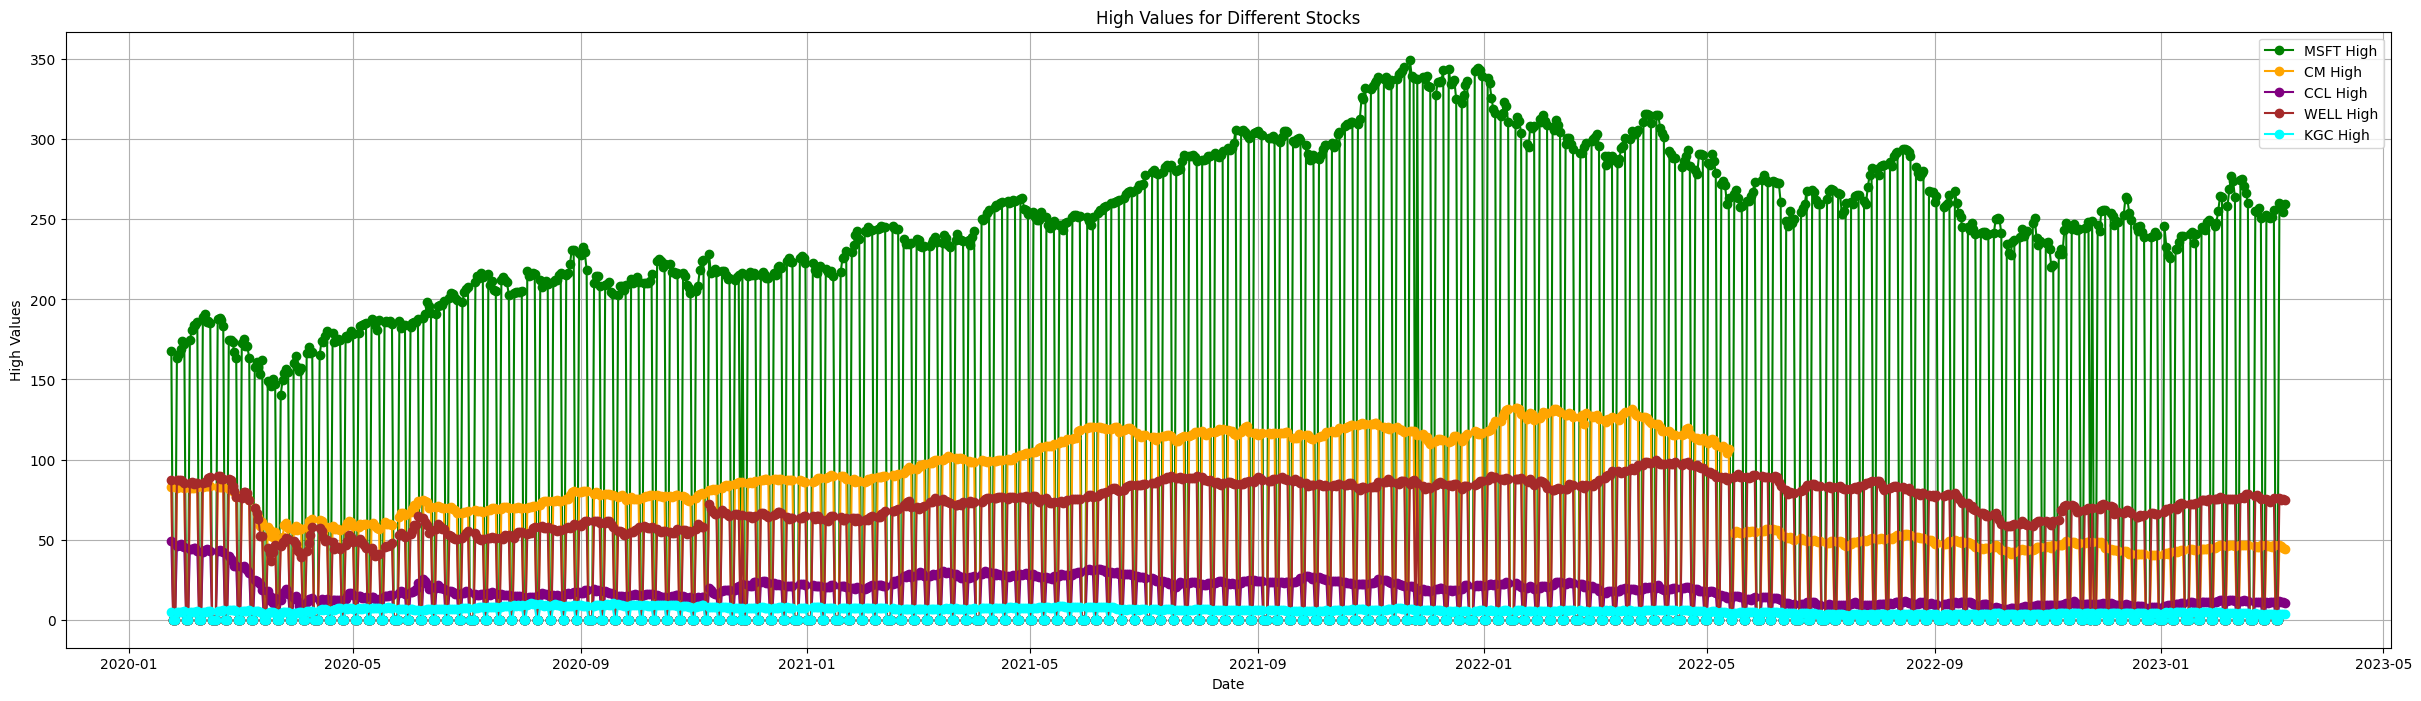

In [13]:
# Assuming global_data contains columns 'Date', 'MSFT_High', 'CM_High', 'CCL_High', 'WELL_High', 'KGC_High'

# Create a DataFrame with sample data (replace this with your actual data)
# global_data = ...

# Convert the 'Date' column to datetime format
global_data['Date'] = pd.to_datetime(global_data['Date'])

# Sort DataFrame by date (if not already sorted)
global_data = global_data.sort_values(by='Date')


# Plotting high values for IBM, CGI, EXPE, SPG, BTO using a simple line chart
plt.figure(figsize=(30, 8))

plt.plot(global_data['Date'], global_data['MSFT_High'], label='MSFT High', marker='o', color='green', linestyle='-')
plt.plot(global_data['Date'], global_data['CM_High'], label='CM High', marker='o', color='orange', linestyle='-')
plt.plot(global_data['Date'], global_data['CCL_High'], label='CCL High', marker='o', color='purple', linestyle='-')
plt.plot(global_data['Date'], global_data['WELL_High'], label='WELL High', marker='o', color='brown', linestyle='-')
plt.plot(global_data['Date'], global_data['KGC_High'], label='KGC High', marker='o', color='cyan', linestyle='-')

# Customize the plot
plt.title('High Values for Different Stocks')
plt.xlabel('Date')
plt.ylabel('High Values')
plt.legend()
plt.grid(True)

plt.show()

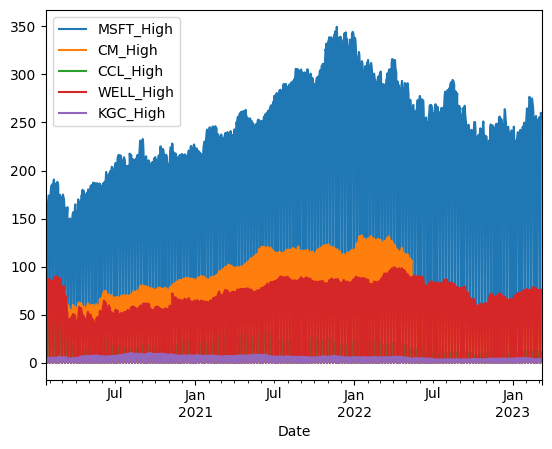

In [14]:
# Setup matplotlib
import matplotlib.pyplot as plt

# Create an axes object
axes = plt.gca()



# pass the axes object to plot function
global_data.plot(kind='line', x='Date', y='MSFT_High', ax=axes);
global_data.plot(kind='line', x='Date', y='CM_High', ax=axes);
global_data.plot(kind='line', x='Date', y='CCL_High', ax=axes);
global_data.plot(kind='line', x='Date', y='WELL_High', ax=axes);
global_data.plot(kind='line', x='Date', y='KGC_High', ax=axes);



In [15]:
global_data.to_csv('global.csv')

In [16]:
def get_daily_data(symbol, start_date, end_date):
    base_url = f'https://www.alphavantage.co/query'

    # API parameters
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': symbol,
        'apikey': api_key,
        'outputsize': 'full'  # Retrieve full historical data
    }

    # Make API request
    response = requests.get(base_url, params=params)
    data = response.json()

    # Extract data for the date range
    daily_data = {date: data['Time Series (Daily)'][date] for date in data['Time Series (Daily)']
                  if start_date <= date <= end_date}

    # Convert data to a Pandas DataFrame
    df = pd.DataFrame.from_dict(daily_data, orient='index')
    df.index = pd.to_datetime(df.index)  # Convert index to datetime
    df.sort_index(inplace=True)  # Sort DataFrame by index date
    return df

# Example usage
symbol = 'AAL'  # Replace with your desired stock symbol
start_date = '2023-01-01'  # Replace with your start date
end_date = '2023-12-31'  # Replace with your end date

stock_data = get_daily_data(symbol, start_date, end_date)
print(stock_data)

NameError: ignored